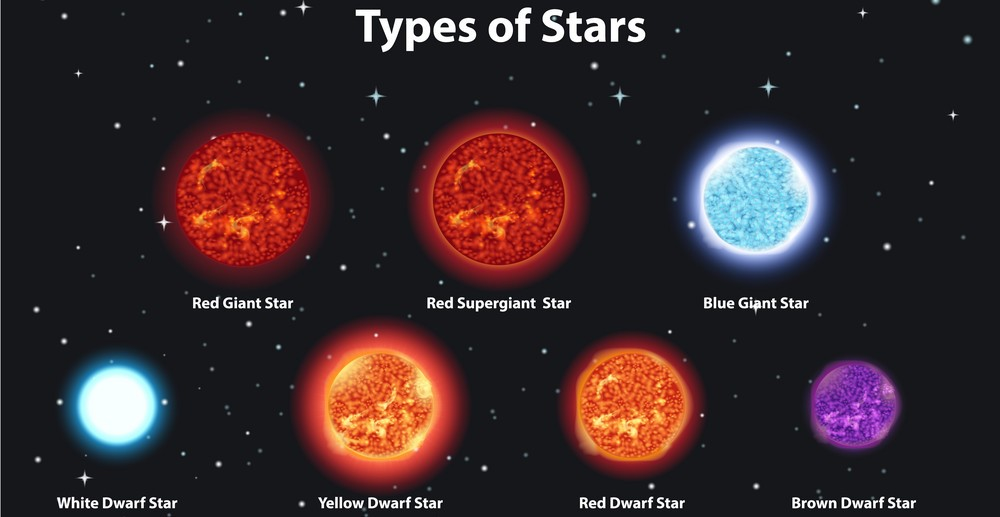

# 📚1. Import Relevant Libraries

In [2]:
# Importing Libraries

# Numpy for mathematical operations & Pandas for data manipulation and analysis
import numpy as np
import pandas as pd

# To check the data type we import 'is_string_dtype' and 'is_numeric_dtype'
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# Matplotlib for  data visualization 
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn is used for plotting statistical graphics
import seaborn as sns

# 
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing


from scipy.stats import shapiro
from scipy import stats

# Standard Scaler
from sklearn.preprocessing import StandardScaler

#SVM
from sklearn.svm import SVC
from sklearn import metrics

# SGDRegressor
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy import random
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# suppress the warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# ⏳2. Loading & Previewing of Data

In [5]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\archive (1)\6 class csv.csv")
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


# 💡3. Understanding the data

In [6]:
print("Dimension of data=>",df.shape)

Dimension of data=> (240, 7)


<font color=yellow, size="4"> 👉 We see that we have 240 records and 7 features.</font>

In [7]:
print("Basic information about the data:-", "\n")
print("*"*50)
df.info()

Basic information about the data:- 

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


<font color=yellow, size="4">👉 We have 3 features with float datatype, 2 with integer datatype and 2 with object datatype.</font>

In [8]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


<font color=yellow, size="4">👉 The table shows a First Look Of The Data.</font>

In [9]:
print("Statistical Analysis:-","\n")
print("-"*90)
df.describe()

Statistical Analysis:- 

------------------------------------------------------------------------------------------


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


<font color=yellow, size="4">👉 Distribution  our numerical variables seems to be not uniform.</font>

In [10]:
print("Checking unique values for each feature:-","\n")
print("-"*40)
df.nunique()

Checking unique values for each feature:- 

----------------------------------------


Temperature (K)           228
Luminosity(L/Lo)          208
Radius(R/Ro)              216
Absolute magnitude(Mv)    228
Star type                   6
Star color                 19
Spectral Class              7
dtype: int64

<font color=yellow, size="4">👉 Following are the continous numerical features: Temperature (K),Luminosity(L/Lo), Radius(R/Ro),Absolute magnitude(Mv), Star type is discrete numeric feature, and Star color and Spectral class are categorical features.</font>

In [11]:
print("Checking null values in entire data:-","\n")
print("-"*35)
df.isnull().sum().sum()

Checking null values in entire data:- 

-----------------------------------


0

<font color=yellow, size="4">👉 We have no null values.✨</font>

In [12]:
print("Checking duplicates in entire data:-","\n")
print("-"*35)
df.duplicated().sum()

Checking duplicates in entire data:- 

-----------------------------------


0

<font color=yellow, size="4">👉 Also, we have no duplicated data.✨</font>





# 🎨4. Expolatory Data Analysis:Visualizations

### <b>4.1 Univariate Analysis - What are the distributions of the individual features</b>
        

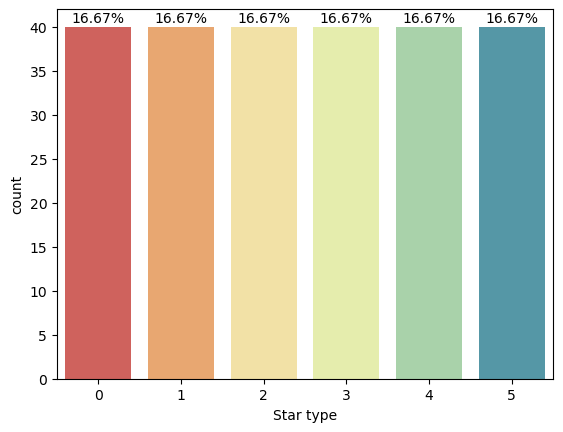

In [13]:
ax=sns.countplot(data=df, x='Star type', palette="Spectral")

percentages=df['Star type'].value_counts()/len(df)*100

#Annotate bars with percentages
for i,p in enumerate(ax.patches):
   height=p.get_height()
   ax.text(p.get_x()+p.get_width()/2, height+0.5, f'{percentages[i]:.2f}%' , ha="center")

# Show the plot
plt.show()

<font color=yellow, size="4">👉 We can see it is multi_class problem. Also, the classes are  balanced.</font>

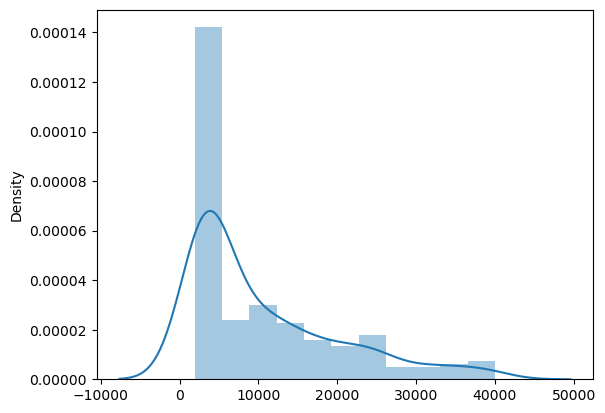

In [14]:
sns.distplot( x=df["Temperature (K)"])
plt.show()

From the above plot we can see that most of the values lies above 0 and below 10000 and also the plot is highly right skewed.  
Range of tempetaure between 1939-40000  
Mean of temperature 10497,   
Media of temperature 5776.

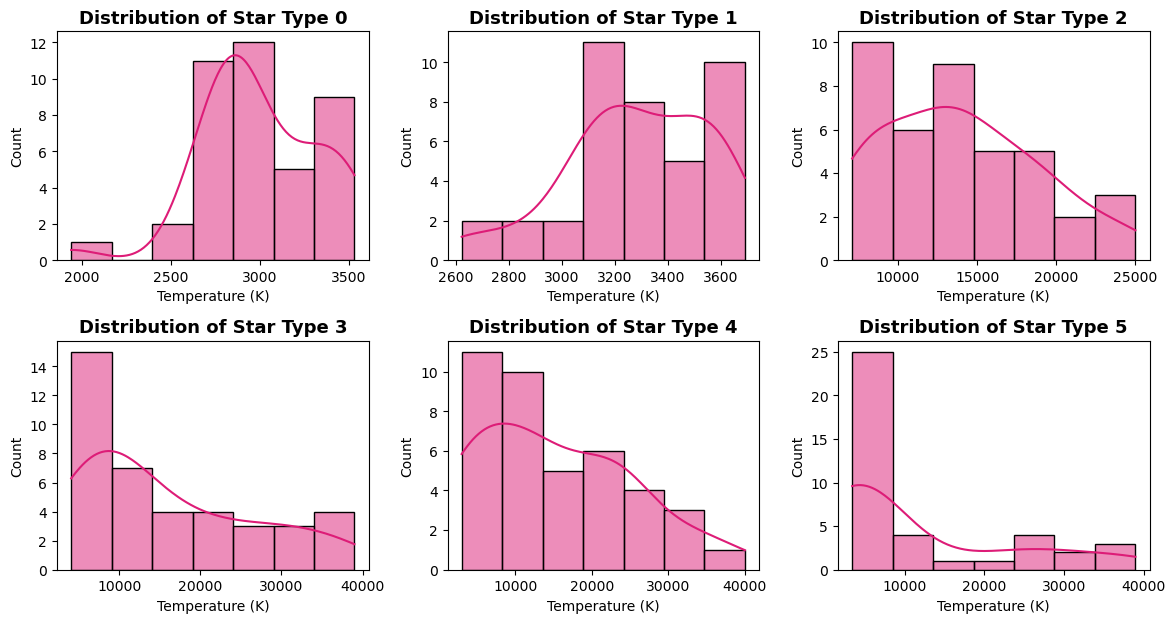

In [15]:
unique_star_types = df["Star type"].unique()

plt.figure(figsize=(12, 9))  # Adjust the figure size if needed

for i, star_type in enumerate(unique_star_types):
    filtered_df = df[df["Star type"] == star_type]
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=filtered_df, x="Temperature (K)", kde=True, color="#dd1c77")
    plt.title(f"Distribution of Star Type {star_type}", fontweight="bold", size=13)

plt.tight_layout()
plt.show()

The above plots depicts that none of the star type has normal disturbution for temperature feature.

### <b>4.2 Bivariate Analysis 🎎</b>
        

In [16]:
num_cols=['Luminosity(L/Lo)','Radius(R/Ro)','Absolute magnitude(Mv)','Star type']
num_cols

['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type']

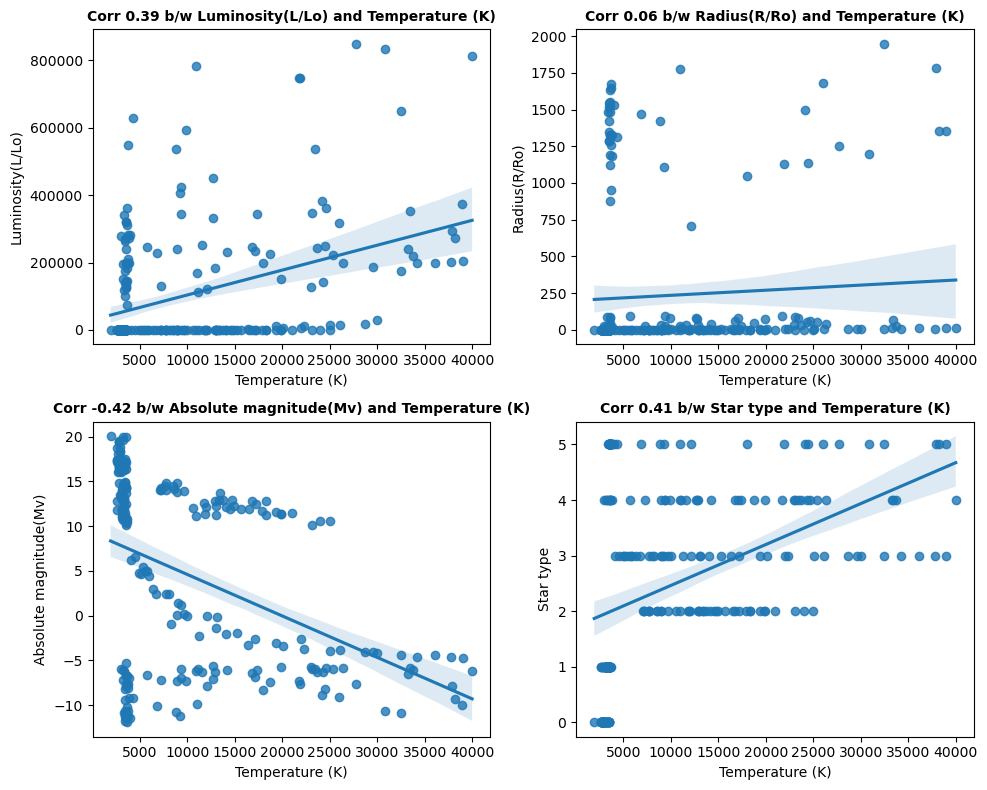

In [17]:
plt.figure(figsize=(10, 8))  # Increase the figure size for better visibility

# Assuming you want to create a 3x3 grid of plots
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.regplot(data=df, x="Temperature (K)", y=col)
    corr = round(df[[col, "Temperature (K)"]].corr().iloc[0, 1], 2)
    plt.title(f"Corr {corr} b/w {col} and Temperature (K)", fontweight="bold", fontsize=10)

plt.tight_layout()
plt.show()

<span style="font-family:Comic Sans MS"><b>📍Observation(s)</b></span>  
The regplot depicts that **`Luminosity(L/Lo)`** , **`Radius(R/Ro)`** has a weak positive correaltion and **`Absolute magnitude(Mv)`** has a medium negative correaltion with the temperature.   

**Target feature**:`Star Type` has a medium positive correlation with the temperatue feature.  

**The hottest stars** are main sequence(3), supergiants(4) and hypergiants(5).

In [18]:
cat_cols=df.select_dtypes(include="object").columns.to_list()
cat_cols

['Star color', 'Spectral Class']

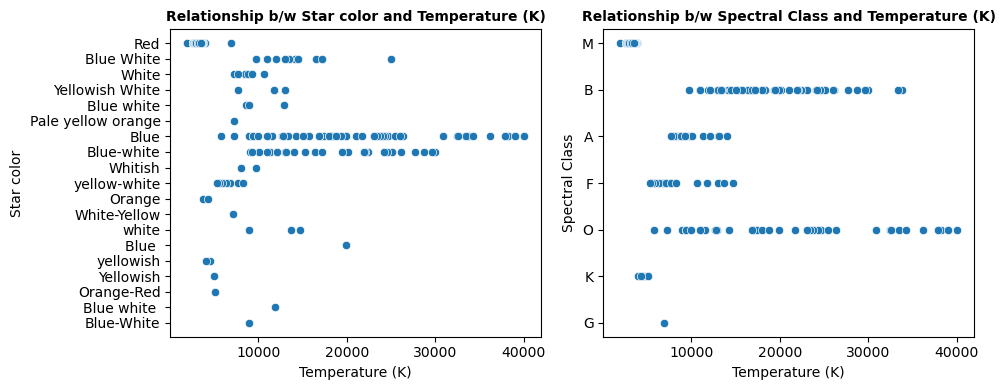

In [19]:
plt.figure(figsize=(10, 4))  # Increase the figure size for better visibility

# Assuming you want to create a 3x3 grid of plots
for i, col in enumerate(cat_cols):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x="Temperature (K)", y=col)
    plt.title(f"Relationship b/w {col} and Temperature (K)", fontweight="bold", fontsize=10)

plt.tight_layout()
plt.show()

<span style="font-family:Comic Sans MS"><b>📍Observation(s)</b></span>   
The **hottest star** is **blue** and the **hottest Spectral clas**s is **O**

In [20]:
con_cols=['Luminosity(L/Lo)','Radius(R/Ro)','Absolute magnitude(Mv)']

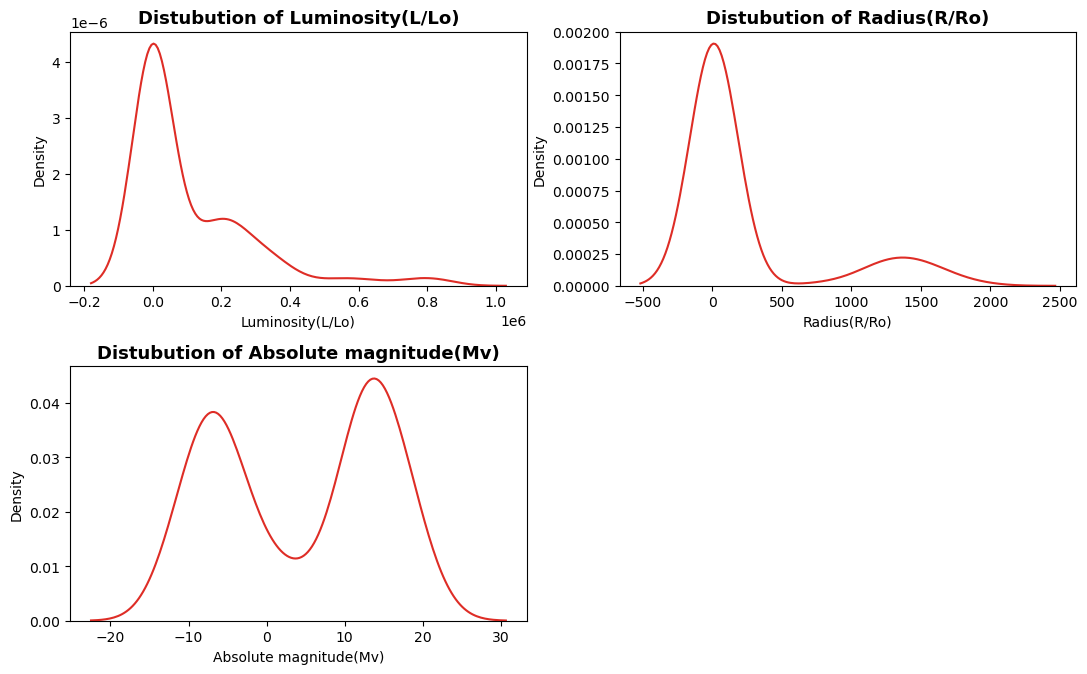

In [21]:
plt.figure(figsize=(11,7))

for i, cols in enumerate(con_cols):
  plt.subplot(2, 2, i+1)
  sns.kdeplot(data=df, x=cols, color="#de2d26")
  plt.title(f"Distubution of {cols}", fontweight="black", size=13 )
plt.tight_layout()
plt.show()

<span style="font-family:Comic Sans MS"><b>📍Observation(s)</b></span>   
**Luminosity(L/Lo)** with a median of 0.07, and **Radius(R/Ro)** with a median value of 0.76 have highly right skewed disturbtion.    
The **Absolute magnitude(Mv)** with median value 8.31 has a bimodal disturbution.


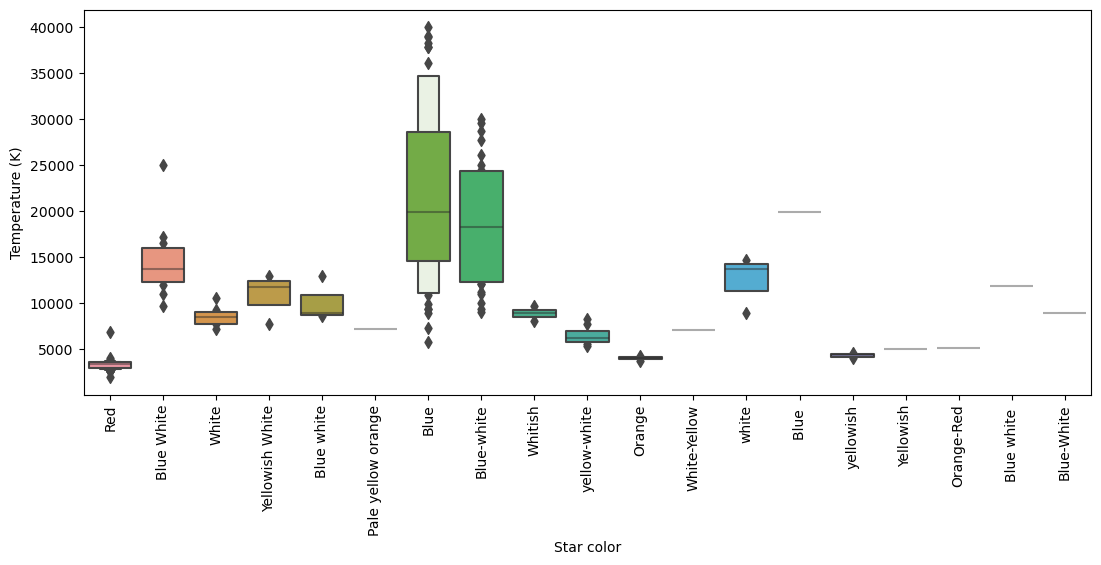

In [22]:
figure= plt.figure(figsize=(13,5))
sns.boxenplot(x='Star color',y='Temperature (K)',data=df)
plt.xticks(rotation=90)
plt.show()

<span style="font-family:Comic Sans MS"><b>📍Observation(s)</b></span>   
The above boxenplot depicts that **"Star color"** Blue has the highest temperature.

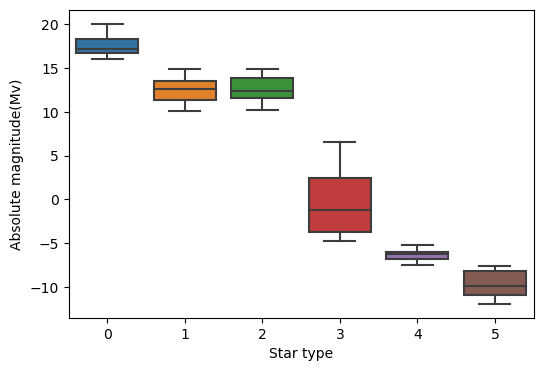

In [23]:
plt.figure(figsize=(6,4))

# Create the box plot with the specified figsize
sns.boxplot(data=df, y = 'Absolute magnitude(Mv)', x = 'Star type') 

# Show the figure
plt.show()

<span style="font-family:Comic Sans MS"><b>📍Observation(s)</b></span>   
<b>Brown Dwarf(0)</b>consists of the high Absolute Visual magnitude(Mv) in all the Star type.


<font color=maroon, size=3>Check whether the means and medians of Red Dwarf -> **Star Type = 1**, White Dwarf-> **Star Type = 2**  statistically **equivalent**?</font>

**Normality of data distribution**

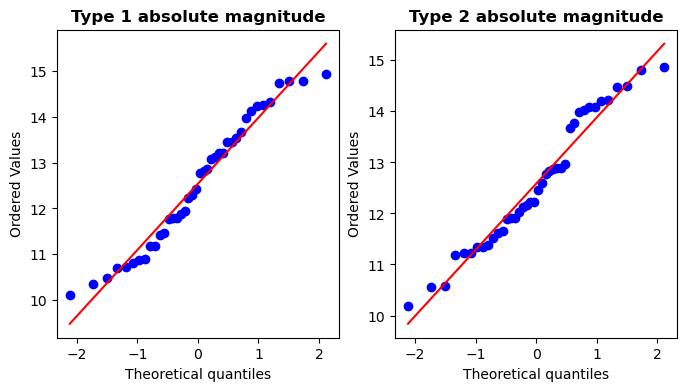

In [24]:

import scipy.stats as stats

plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
# Use backticks to enclose column name with spaces
data = df.query('`Star type` == 1')['Absolute magnitude(Mv)']

# Create a QQ plot
stats.probplot(data, dist="norm", plot=plt)
plt.title("Type 1 absolute magnitude", fontweight="black")


plt.subplot(1, 2, 2)
data = df.query('`Star type` == 2')['Absolute magnitude(Mv)']
# Create a QQ plot
stats.probplot(data, dist="norm", plot=plt)
plt.title("Type 2 absolute magnitude", fontweight="black")

plt.show()


The qqplot analysis indicates that the variables follow a normal distribution, which can also be verified with the Shapiro-Wilk test.  
### Shapiro-Wilk test

In [25]:
stat1, pvalue1 = shapiro(df.query('`Star type` == 1')['Absolute magnitude(Mv)'])

stat2, pvalue2 = shapiro(df.query('`Star type` == 2')['Absolute magnitude(Mv)'])

In [26]:
print("Type 1 absolute magnitude:", pvalue1 <= 0.05)
if pvalue1>0.05:
   print("Fail to reject null hypothesis","\n")

print("Type 2 absolute magnitude:", pvalue1 <= 0.05)
if pvalue2>0.05:
   print("Fail to reject null hypothesis")

Type 1 absolute magnitude: False
Fail to reject null hypothesis 

Type 2 absolute magnitude: False
Fail to reject null hypothesis


In both cases the p value of the samples is greater than the  α
  value. Therefore, we fail to reject hypothesis  H0
 , and the distribution of variables follows a normal distribution🎈.

### <b>4.3 Multivariate Analysis</b>

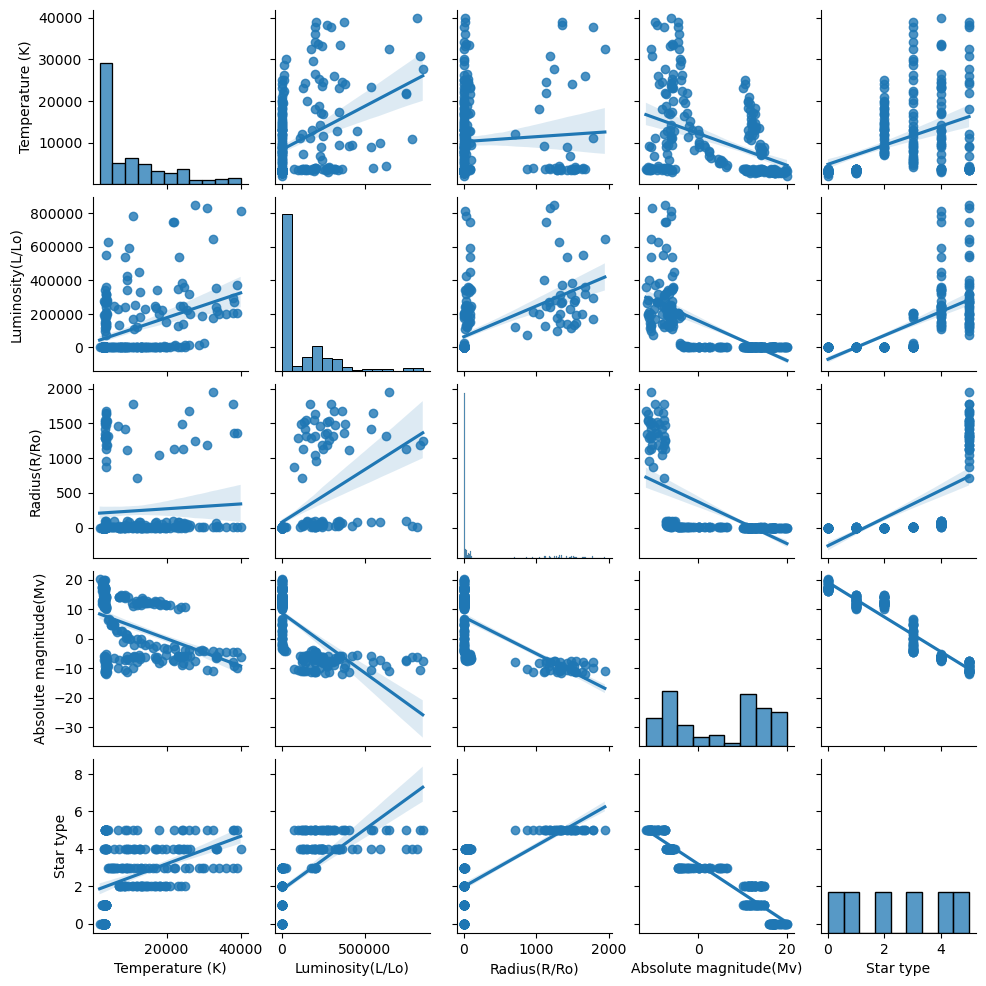

In [28]:
sns.pairplot(df, palette="husl", kind="reg", height=2)
plt.show()

<span style="font-family:Comic Sans MS"><b>📍Observation(s)</b></span>     
We can observe that **Absolute magnitude(Mv)** have a negative correlation with all the variables.   
Whereas the target feature categories **brown, red and white dwarfs** shows the **maximum Absolute magnitude(Mv)**.

<Axes: >

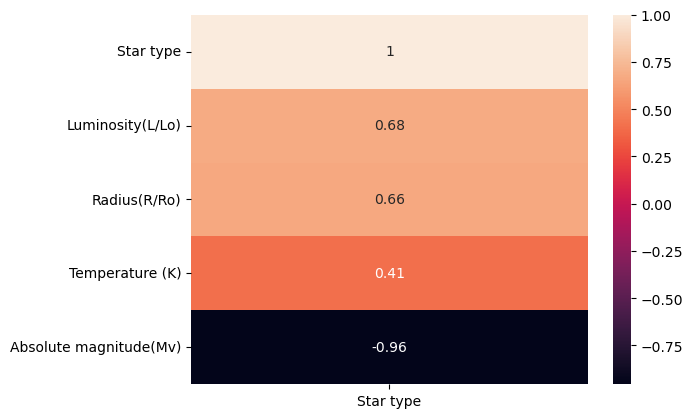

In [29]:
num_cols=["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)", "Star type"]
corr=df[num_cols].corr()["Star type"].to_frame().sort_values(by="Star type", ascending=False)
corr
sns.heatmap(corr, annot=True)

<span style="font-family:Comic Sans MS"><b>📍Observation(s)</b></span>      
We can observe that Luminosity and Radius features have a strong correlation with target feature Star types whereas, temperature and have a medium and Abolute magnitude have a strong negative correaltion with target feature.

# 🧩5. Feature Encoding

### <b>5.1 Ordinal Encoding</b>

In [30]:
oe=OrdinalEncoder(categories=[['M', 'B', 'A', 'F', 'O', 'K', 'G']], dtype="int")

In [31]:
oe.fit(df[["Spectral Class"]])

OrdinalEncoder(categories=[['M', 'B', 'A', 'F', 'O', 'K', 'G']], dtype='int')

In [32]:
df["Spectral Class"]=oe.transform(df[["Spectral Class"]])

In [33]:
df.tail()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
235,38940,374830.0,1356.0,-9.93,5,Blue,4
236,30839,834042.0,1194.0,-10.63,5,Blue,4
237,8829,537493.0,1423.0,-10.73,5,White,2
238,9235,404940.0,1112.0,-11.23,5,White,2
239,37882,294903.0,1783.0,-7.80,5,Blue,4


### <b>5.2 K-1 OneHotEncoding using pandas</b>

In [34]:
df=pd.get_dummies(df, columns=["Star color"], drop_first=True, dtype="int")

In [35]:
df.tail()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Spectral Class,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,...,Star color_Pale yellow orange,Star color_Red,Star color_White,Star color_White-Yellow,Star color_Whitish,Star color_Yellowish,Star color_Yellowish White,Star color_white,Star color_yellow-white,Star color_yellowish
235,38940,374830.0,1356.0,-9.93,5,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236,30839,834042.0,1194.0,-10.63,5,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237,8829,537493.0,1423.0,-10.73,5,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
238,9235,404940.0,1112.0,-11.23,5,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
239,37882,294903.0,1783.0,-7.80,5,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 🧱6. Separating features and labels for Model Training

In [36]:
X= df.drop(columns=["Star type"], axis=1)
y=df["Star type"]

### <b> 6.1 Splitting data to train and test model</b>

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=43)

In [38]:
print("x_train==>", X_train.shape)
print("x_test==>",X_test.shape)
print("y_train==>",y_train.shape)
print("y_test==>",y_test.shape)

x_train==> (192, 23)
x_test==> (48, 23)
y_train==> (192,)
y_test==> (48,)


# 🧮7. Model Building

In [49]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(n_jobs=1,n_estimators=5,max_depth=5),
    DecisionTreeClassifier(criterion="entropy", splitter="random",max_depth=5),
]

algorithms = [
    'LogisticRegression', 'KNeighborsClassifier',
    'RandomForestClassifier',
    'DecisionTreeClassifier'
]


In [52]:
results = []

for model, algorithm in zip(models, algorithms):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict the target values on the test data
    pred = model.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, pred)

    results.append({'Algorithm': algorithm, 'Accuracy': accuracy})

diff_models= pd.DataFrame(results)
diff_models.sort_values('Accuracy',ascending=False).reset_index(drop=True)

,Algorithm,Accuracy
0,DecisionTreeClassifier,0.979167
1,RandomForestClassifier,0.958333
2,KNeighborsClassifier,0.750000
3,LogisticRegression,0.520833


In [53]:
final=pd.DataFrame({"Actual":y_test,"Predict":pred})
final

,Actual,Predict
150,3,3
82,2,2
142,2,2
174,5,5
200,2,2
17,1,1
137,1,1
141,2,2
29,2,2
78,1,1


In [55]:
from sklearn import metrics
cm= metrics.confusion_matrix(y_test, pred)
cm

array([[ 8,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  1,  4,  0],
       [ 0,  0,  0,  0,  0,  7]], dtype=int64)